# Guided Practice: Multiple Regression Analysis using citi bike data 

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, metrics

import statsmodels.api as sm

%matplotlib inline

bike_data = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-07/assets/dataset/bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Review! Distributions:

-0.00602088334827
-0.94184420407


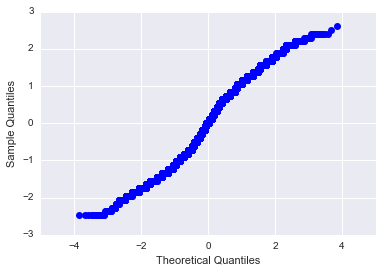

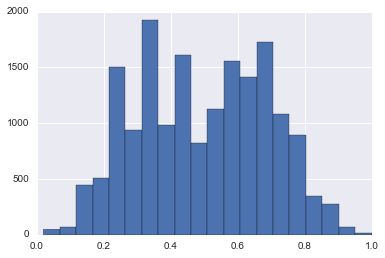

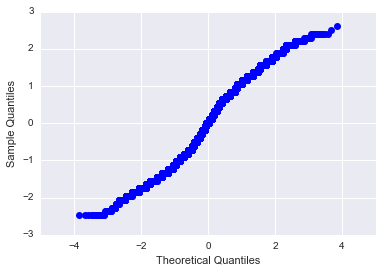

In [73]:
print bike_data['temp'].skew()
print bike_data['temp'].kurt()

bike_data['temp'].hist(bins=20)
sm.qqplot(bike_data['temp'], fit=True)


![QQ plot types](http://i.stack.imgur.com/ZXRkL.png)

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [74]:
from sklearn import feature_selection, linear_model

# From last class...
def get_linear_model_metrics(X, y):
    
    # *TODO* 1: Describe in your words
    model = linear_model.LinearRegression()   # Specify the model
    pvals = feature_selection.f_regression(X, y)[1]  # Defining the model
    # get the pvalue of X given y. Ignore f-stat for now.
    
    # *TODO*: Describe in your words
    
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    model.fit(X, y)

    residuals = (y - model.predict(X)).values

    # print the necessary values
    # *TODO*: Describe in your words
    print 'P Values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    # keep the model
    return model

In [66]:
y = bike_data['casual']

lm = linear_model.LinearRegression()

weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
weather = pd.get_dummies(bike_data.weathersit)
print weather

         1    2    3    4
0      1.0  0.0  0.0  0.0
1      1.0  0.0  0.0  0.0
2      1.0  0.0  0.0  0.0
3      1.0  0.0  0.0  0.0
4      1.0  0.0  0.0  0.0
5      0.0  1.0  0.0  0.0
6      1.0  0.0  0.0  0.0
7      1.0  0.0  0.0  0.0
8      1.0  0.0  0.0  0.0
9      1.0  0.0  0.0  0.0
10     1.0  0.0  0.0  0.0
11     1.0  0.0  0.0  0.0
12     1.0  0.0  0.0  0.0
13     0.0  1.0  0.0  0.0
14     0.0  1.0  0.0  0.0
15     0.0  1.0  0.0  0.0
16     0.0  1.0  0.0  0.0
17     0.0  1.0  0.0  0.0
18     0.0  0.0  1.0  0.0
19     0.0  0.0  1.0  0.0
20     0.0  1.0  0.0  0.0
21     0.0  1.0  0.0  0.0
22     0.0  1.0  0.0  0.0
23     0.0  1.0  0.0  0.0
24     0.0  1.0  0.0  0.0
25     0.0  1.0  0.0  0.0
26     0.0  1.0  0.0  0.0
27     0.0  1.0  0.0  0.0
28     0.0  1.0  0.0  0.0
29     0.0  0.0  1.0  0.0
...    ...  ...  ...  ...
17349  0.0  1.0  0.0  0.0
17350  1.0  0.0  0.0  0.0
17351  1.0  0.0  0.0  0.0
17352  1.0  0.0  0.0  0.0
17353  1.0  0.0  0.0  0.0
17354  1.0  0.0  0.0  0.0
17355  1.0  

In [76]:
X = pd.concat(bike_data["temp"],bike_data["atemp"])

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

# Building a model to predict guest ridership
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
# Hint: use sns.heatmap or sns.pairplot(df) to explore your variable relationships!

In [87]:
# Sample starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
# weather

workingday = pd.get_dummies(bike_data.workingday)
# workingday

In [108]:
bike_data = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-07/assets/dataset/bikeshare.csv')
bike_data.head()

#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]

#join those new variables back into the larger dataset
bikemodel_data2 = bike_data.join(weather)

print bikemodel_data2.columns

# bike_data["weather_1"] = weather[1]
# bike_data["weather_2"] = weather[2]
# bike_data["weather_3"] = weather[3]

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_weather_1', 'weather_weather_2', 'weather_weather_3', "cnt", "season"] #[which_variables?]

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_1',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_2',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_3',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_weather_4'],
      dtype='object')


In [110]:
bikemoel_data2.head()

NameError: name 'bikemoel_data2' is not defined

In [99]:
workingday.columns = ['working_' + str(i) for i in workingday.columns]
bikemodel_data1 = bikemodel_data.join(workingday)

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_1',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_2',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_3',
       u'weather_weather_weather_weather_weather_weather_weather_weather_weather_4',
       u'working_working_working_working_working_0',
       u'working_working_working_working_working_1'],
      dtype='object')


In [97]:
bikemodel_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,weather_weather_weather_weather_weather_weather_weather_1,weather_weather_weather_weather_weather_weather_weather_2,weather_weather_weather_weather_weather_weather_weather_3,weather_weather_weather_weather_weather_weather_weather_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0000,3,13,16,1.0,0.0,0.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0000,8,32,40,1.0,0.0,0.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0000,5,27,32,1.0,0.0,0.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0000,3,10,13,1.0,0.0,0.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0000,0,1,1,1.0,0.0,0.0,0.0
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,0.2576,0.75,0.0896,0,1,1,0.0,1.0,0.0,0.0
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,0.2727,0.80,0.0000,2,0,2,1.0,0.0,0.0,0.0
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,0.2576,0.86,0.0000,1,2,3,1.0,0.0,0.0,0.0
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,0.2879,0.75,0.0000,1,7,8,1.0,0.0,0.0,0.0
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,0.3485,0.76,0.0000,8,6,14,1.0,0.0,0.0,0.0


In [70]:
#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?

print correlations
print sns.heatmap(correlations, cmap=cmap)

KeyError: "['weather_1' 'weather_2' 'weather_3'] not in index"

In [84]:
y = bike_data['casual']
lm = linear_model.LinearRegression()

get_linear_model_metrics(bikemodel_data[columns_to_keep], y)

P Values: [  0.00000000e+00   3.75616929e-73   3.43170021e-22   1.57718666e-55
   0.00000000e+00   6.01115086e-57]
Coefficients: [ 58.3718743    1.41780585  -2.5443123   -4.64867756   0.16497455
  -2.65322811]
y-intercept: -17.8392968432
R-Squared: 0.525755967065



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Independent Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 

### You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [ ]:
# your code here...

bike_data.columns

In [17]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


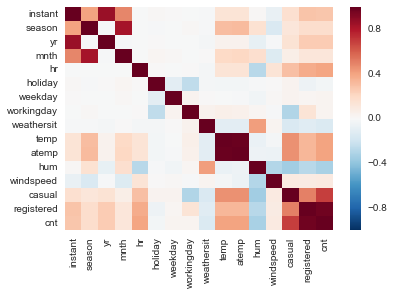

In [16]:
sns.heatmap(bike_data.corr())

In [13]:
weather = pd.get_dummies(bike_data.weathersit)
weather.head()

,1,2,3,4
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [10]:
y = bike_data['casual']

lm = linear_model.LinearRegression()

weather = pd.get_dummies(bike_data.weathersit)
X = 

get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# add as many cells as you need :) 

#### 1: What's the strongest predictor? 

Answer:

#### 2: How well did your model do? 

Answer:

#### 3: How can you improve it? 

Answer:

### Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders.

**Bonus 1:** What's the strongest predictor? 

**Bonus 2:** How well did your model do? 

**Bonus 3:** How can you improve it? 

### Additional Resources:

- Good explanation of when to apply log scaling: http://stats.stackexchange.com/a/28007